# Machine Learning - Linguagem Natural

* Dataset retirado do [link](https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr?resource=download)

In [8]:
!unzip -FF imdb-pt-br.zip

Archive:  imdb-pt-br.zip
  inflating: imdb-reviews-pt-br.csv  


In [9]:
import pandas as pd
import numpy as np

resenha = pd.read_csv("/content/imdb-reviews-pt-br.csv")
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [10]:
from sklearn.model_selection import train_test_split

X = resenha["text_pt"]
y = resenha['sentiment']
treino_x, teste_x, treino_y, teste_y = train_test_split(X, y, 
                                                        random_state=42,
                                                        test_size=.3)

In [11]:
print(f"tamanho treino_x: {len(treino_x)}")
print(f"tamanho teste_x: {len(teste_x)}")
print(f"tamanho treino_y: {len(treino_y)}")
print(f"tamanho teste_y: {len(teste_y)}")

tamanho treino_x: 34621
tamanho teste_x: 14838
tamanho treino_y: 34621
tamanho teste_y: 14838


In [14]:
from sklearn.linear_model import LogisticRegression

try:
  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino_x, treino_y)
  acuracia = regressao_logistica.score(teste_x, teste_y)
  print(acuracia)
except ValueError as ex:
  print("Prova de que precisa converter os dados X e y em valores númericos para o treinamento")
  print(f"Erro: {ex}")

Prova de que precisa converter os dados X e y em valores númericos para o treinamento
Erro: could not convert string to float: 'Outra tentativa idiota de tornar o filme "violento" e "instigante" - seja lá o que isso signifique. Eles têm Al Pacino dizer muitas palavras como - "Televisão matou futebol". Sim o que seja. Este é outro filme que mostra Oliver Stones Delusions of Grandeur. Se Stone está tentando nos mostrar que o futebol será nossa queda ou algo do tipo, por que ele insiste em romantizar o esporte com seus movimentos de câmera e canções Kid Rock? Ele até joga Cameron Diaz na briga por razões puramente estéticas. É uma pena que Diaz e Pacino tenham que se encontrar em um filme tão ruim. Desde "Scent of Woman", escritores e diretores usaram Pacino para romantizar suas linhas patéticas. Seus personagens são nada mais que alto-falantes - suas vozes encobrindo o que normalmente seria redundante e banal. Ele precisa se reinventar, mostrando como ele pode agir sem gritar. Ele tem qu

In [15]:
print("Negativa \n")
print(X[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [16]:
resenha.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [17]:
classificacao = resenha.sentiment.replace(["neg", "pos"], [0, 1])
classificacao

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [18]:
resenha["classificacao"] = classificacao
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um Filme ótimo", "Assisti um filme ruim"]

vetorizador = CountVectorizer(lowercase=False)
bag_of_words = vetorizador.fit_transform(texto)
print(vetorizador.get_feature_names_out())
print(bag_of_words.toarray())

['Assisti' 'Filme' 'filme' 'ruim' 'um' 'ótimo']
[[1 1 0 0 1 1]
 [1 0 1 1 1 0]]


In [20]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizador.get_feature_names_out())
matriz_esparsa

,Assisti,Filme,filme,ruim,um,ótimo
0,1,1,0,0,1,1
1,1,0,1,1,1,0


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["I watched a great movie", "I watched an awful movie"]

vetorizador = CountVectorizer()
bag_of_words = vetorizador.fit_transform(texto)
df = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizador.get_feature_names_out())
df

,an,awful,great,movie,watched
0,0,0,1,1,1
1,1,1,0,1,1


In [22]:
vetorizador = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizador.fit_transform(X)
print(bag_of_words.shape)

(49459, 50)


In [23]:
bag_of_words

<49459x50 sparse matrix of type '<class 'numpy.int64'>'
	with 1306687 stored elements in Compressed Sparse Row format>

In [24]:
treino_x, teste_x, treino_y, teste_y = train_test_split(bag_of_words, y, 
                                                        random_state=42,
                                                        test_size=.3)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino_x, treino_y)
acuracia = regressao_logistica.score(teste_x, teste_y)
print(acuracia)

0.6582423507211215


In [25]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
acuracia_baseline = dummy.score(teste_x, teste_y)
print(acuracia_baseline)

0.4947432268499798


In [26]:
print("Melhoria sobre baseline: %.2f%%" % (100*(acuracia - acuracia_baseline)))

Melhoria sobre baseline: 16.35%


In [27]:
def classificar_texto(df, coluna_texto, coluna_classificacao, max_features=50):
  vetorizador = CountVectorizer(lowercase=False, 
                                max_features=max_features)
  bag_of_words = vetorizador.fit_transform(df[coluna_texto])
  print(bag_of_words.shape)

  treino_x, teste_x, treino_y, teste_y = train_test_split(bag_of_words,
                                                          df[coluna_classificacao], 
                                                          random_state=42,
                                                          test_size=.3)

  dummy = DummyClassifier()
  dummy.fit(treino_x, treino_y)
  acuracia_baseline = dummy.score(teste_x, teste_y)

  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino_x, treino_y)
  acuracia = regressao_logistica.score(teste_x, teste_y)

  print("Melhoria sobre baseline: %.2f%%" % (100*(acuracia - acuracia_baseline)))

  return acuracia

classificar_texto(resenha, "text_pt", "classificacao")

(49459, 50)
Melhoria sobre baseline: 16.35%


0.6582423507211215

In [28]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha.text_pt])
print(len(todas_palavras))

63448424


In [30]:
nuvem_palavras = WordCloud(width=800,
                           height=500,
                           max_font_size=110,
                           collocations=False).generate(todas_palavras)

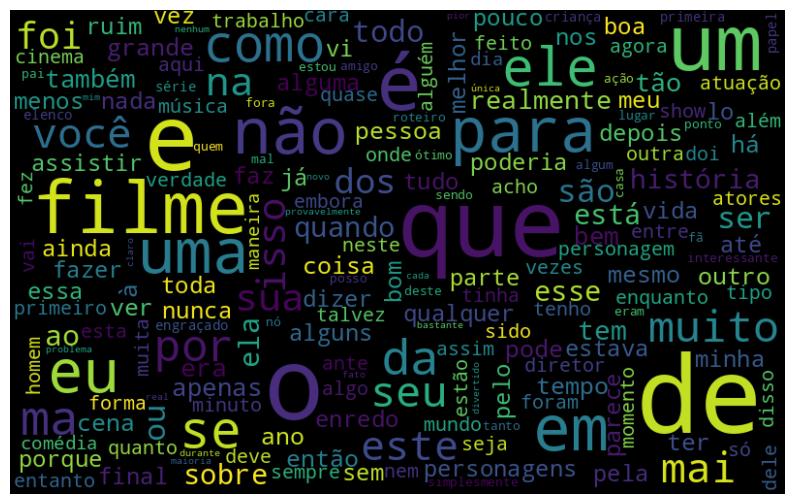

In [31]:
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
resenha.query("sentiment == 'pos'")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


Word cloud positivo:


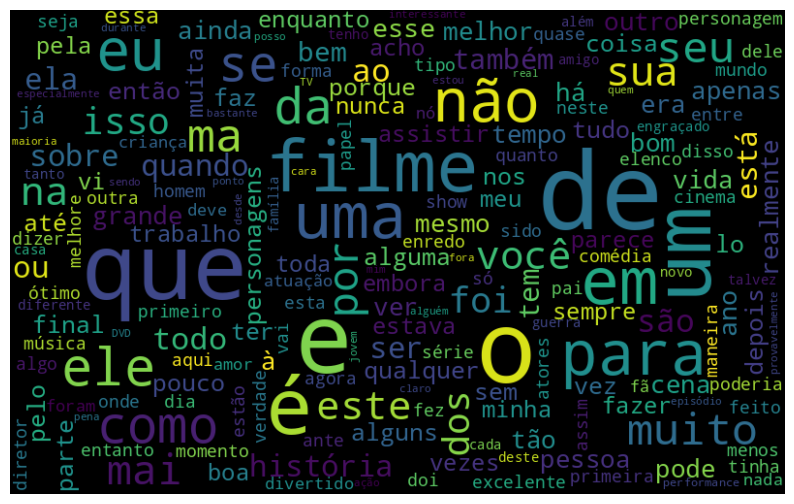

Word cloud negativo:


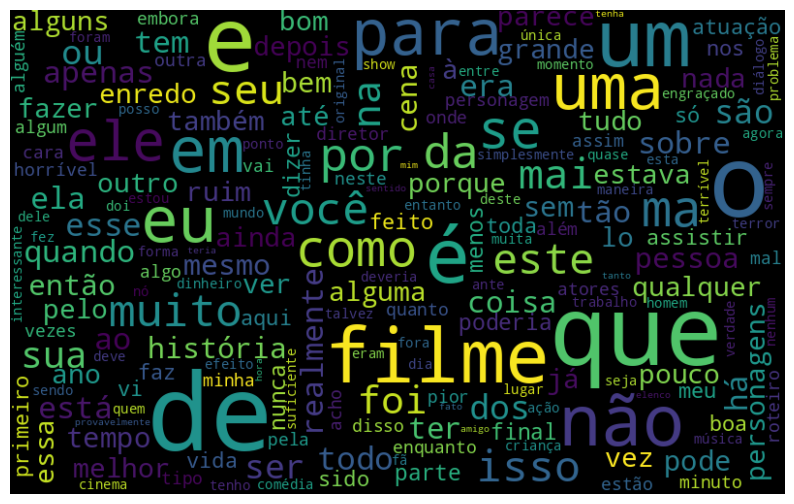

In [33]:
def generate_word_cloud(df, coluna_texto, busca):
  todas_palavras = ' '.join([texto for texto in df.query(busca)[coluna_texto]])
  nuvem_palavras = WordCloud(width=800,
                            height=500,
                            max_font_size=110,
                            collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

print("Word cloud positivo:")
generate_word_cloud(resenha, "text_pt", "sentiment == 'pos'")

print("Word cloud negativo:")
generate_word_cloud(resenha, "text_pt", "sentiment == 'neg'")

In [36]:
import nltk
from nltk import tokenize

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [37]:
frases = ["um filme ruim", "um filme bom"]
frequencia = nltk.FreqDist(frases)
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [42]:
frase = "Bem vindo ao mundo PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['Bem', 'vindo', 'ao', 'mundo', 'PLN!']

In [43]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({"palavra": list(frequencia.keys()),
                              "frequencia": list(frequencia.values())})

In [44]:
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [45]:
df_frequencia.nlargest(columns=["frequencia"], n=10)

,palavra,frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


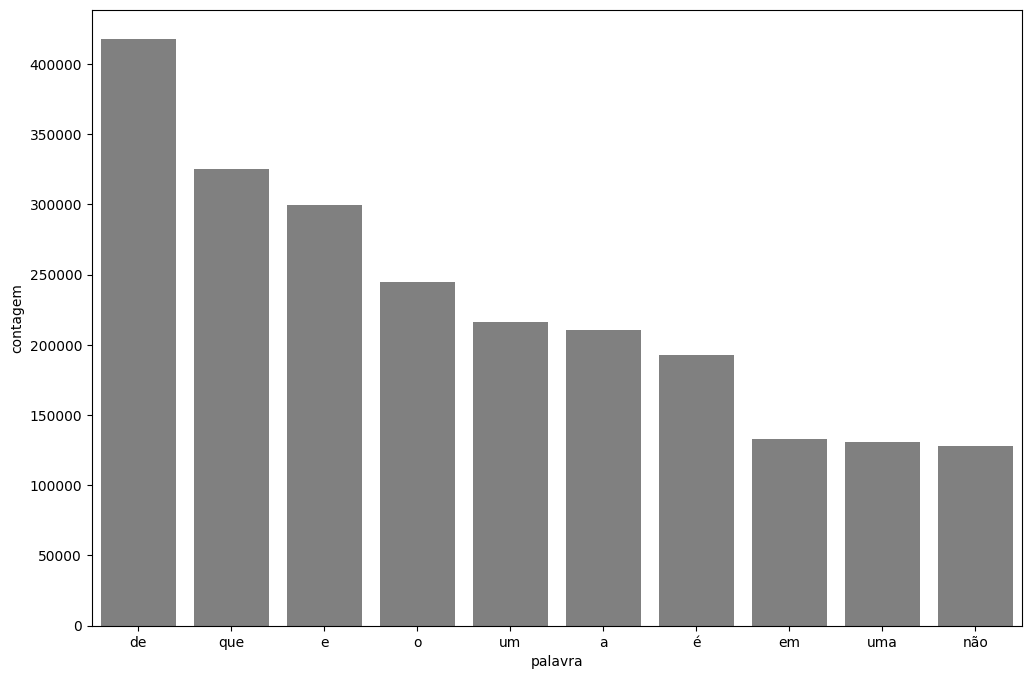

In [49]:
import seaborn as sns

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_frequencia.nlargest(columns=["frequencia"], n=10), 
                 x="palavra", 
                 y="frequencia", 
                 color="gray")
ax.set(ylabel="contagem")
plt.show()

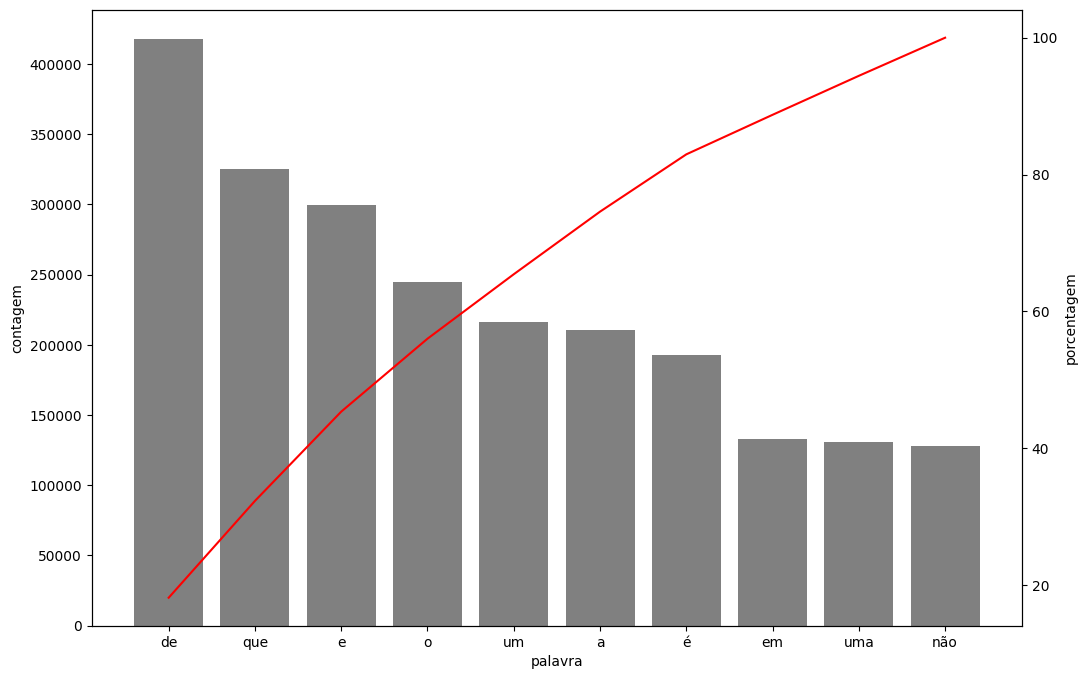

In [55]:
def plot_pareto(df, coluna_texto, busca=None, quantidade=10):
  df_busca = df if busca is None else df.query(busca)
  todas_palavras = ' '.join([texto for texto in df_busca[coluna_texto]])
  token_espaco = tokenize.WhitespaceTokenizer()
  token_frase = token_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)

  df_frequencia = pd.DataFrame({"palavra": list(frequencia.keys()),
                                "frequencia": list(frequencia.values())})
  df_nlargest = df_frequencia.nlargest(columns=["frequencia"], n=quantidade)
  total = df_nlargest["frequencia"].sum()
  df_nlargest["porcentagem"] = df_nlargest["frequencia"].cumsum() / total * 100

  plt.figure(figsize=(12, 8))
  ax = sns.barplot(data=df_nlargest, 
                  x="palavra", 
                  y="frequencia", 
                  color="gray")
  ax.set(ylabel="contagem")
  ax_sum = ax.twinx()
  sns.lineplot(data=df_nlargest, 
               x="palavra", 
               y="porcentagem",
               color="red", 
               sort=False, 
               ax=ax_sum)
  plt.show()

plot_pareto(resenha, "text_pt", quantidade=10)

In [57]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
print(len(palavras_irrelevantes))
print(palavras_irrelevantes[:10])

207
['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as']


In [58]:
frase_processada = list()
for opiniao in resenha.text_pt:
  nova_frase = list()
  token_frase = token_espaco.tokenize(opiniao)
  for palavra in token_frase:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))
resenha["tratamento_1"] = frase_processada

In [59]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [60]:
classificar_texto(resenha, "tratamento_1", "classificacao")

(49459, 50)
Melhoria sobre baseline: 18.59%


0.6806173338724896

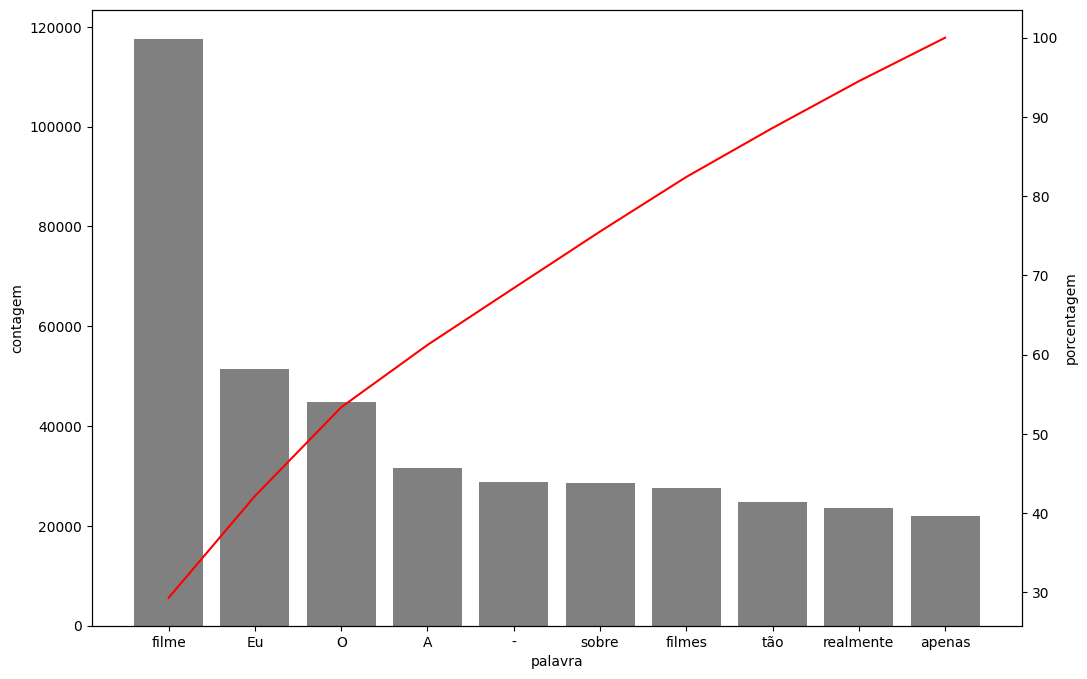

In [61]:
plot_pareto(resenha, "tratamento_1", quantidade=10)